# Adjusting Brightness

## Adding a constant value
  Adding a positive *constant* to all of the image pixel values makes the image brighter. Similarly, we can subtract a positive    constant from all of the pixel values to make the image darker.Then normalise the pixel values between 0-255

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import timeit

def Brightness_Increase(src_img,brightnes_val):
    #Create a destination image of same size
    dst_img = np.zeros((src_img.shape[0],src_img.shape[1],src_img.shape[2]))
    
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            for k in range(src_img.shape[2]):
                dst_img[i,j,k] = np.clip((src_img[i,j,k]+brightnes_val),0,255)
    
    return dst_img


# Adjusting Contrast
While brightness refers to the overall lightness or darkness of an image, contrast refers to the brightness difference between different objects or regions of the image.
The first step is to calculate a contrast correction factor which is given by the following formula:
    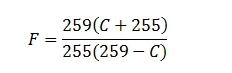
In order for the algorithm to function correctly the value for the contrast correction factor (F) needs to be stored as a floating point number and not as an integer. The value C in the formula denotes the desired level of contrast.

The next step is to perform the actual contrast adjustment itself. The following formula shows the adjustment in contrast being made to the red component of a colour:
    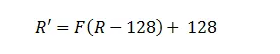

## Sudo Code 
#### factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
####  colour = GetPixelColour(x, y)
#### newRed   = Truncate(factor * (Red(colour)   - 128) + 128)
#### newGreen = Truncate(factor * (Green(colour) - 128) + 128)
#### newBlue  = Truncate(factor * (Blue(colour)  - 128) + 128)
#### PutPixelColour(x, y) = RGB(newRed, newGreen, newBlue)

In [133]:
#Function to increase the contrast of an image 
def Adjust_Contrast(src_img,contrast):
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    dst_image = np.zeros((src_img.shape[0],src_img.shape[1],src_img.shape[2]))
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            for k in range(src_img.shape[2]):
                pixel_value = np.clip((factor * (src_img[i,j,k] - 128) + 128),0,255)
                dst_image[i,j,k] = pixel_value
    out_img = Image.fromarray((dst_image).astype(np.uint8))
    return out_img
         

In [134]:
#Function to adjust the contrast and brightness of an image 
# Below  funcion is taken from OpenCV Documenation
def Adjust_Contrast_Brightness(src_img,contrast,brightnes):
    factor = (259 * (contrast + 255)) / (255 * (259 - contrast))
    dst_image = np.zeros((src_img.shape[0],src_img.shape[1],src_img.shape[2]))
    for i in range(src_img.shape[0]):
        for j in range(src_img.shape[1]):
            for k in range(src_img.shape[2]):
                dst_image[i,j,k] = np.clip(contrast*src_img[i,j,k] + brightnes, 0, 255)
    out_img = Image.fromarray((dst_image).astype(np.uint8))
    return out_img


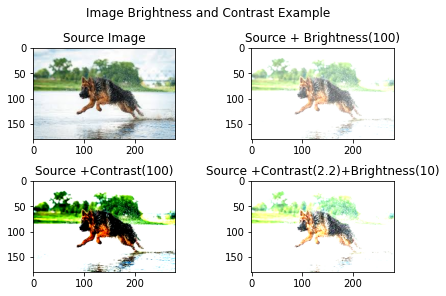

In [136]:
src_img = np.array(Image.open(".\\Dog.jpg"))
contrast = 128
brightnes = 100
# Adjust brightness of image
bright_img = Brightness_Increase(src_img,brightnes)

# Adjust contrast of an image
contrast_img = Adjust_Contrast(src_img,contrast)

contrast =2.2
brightnes =10
# Adjust contrast of an image
contrastBright_img = Adjust_Contrast_Brightness(src_img,contrast,brightnes)


figure, axes = plt.subplots(nrows=2, ncols=2,constrained_layout=True)
figure.suptitle("Image Brightness and Contrast Example")

# Plot Source image
axes[0, 0].imshow(src_img)
axes[0, 0].title.set_text('Source Image')

# Plot bright_img image
axes[0, 1].imshow(bright_img.astype(np.uint8))
axes[0, 1].title.set_text('Source + Brightness(100)')

# Plot contrast_img image
axes[1, 0].imshow(contrast_img)
axes[1, 0].title.set_text('Source +Contrast(100)')

# Plot contrastBright_img image
axes[1, 1].imshow(contrastBright_img)
axes[1, 1].title.set_text('Source +Contrast(2.2)+Brightness(10)')

plt.show()
